In [1]:
from datasets import SphericalUniform, UchuuCentered

uniform = SphericalUniform(radius=1)
lss = UchuuCentered(datafile='/home/df630/LargeScaleStructureFlows/data/Uchuu1000-Pl18_z0p00_hlist_4.h5', radius=36)

target_data = lss.sample()
source_data = uniform.sample(num_points=len(target_data))

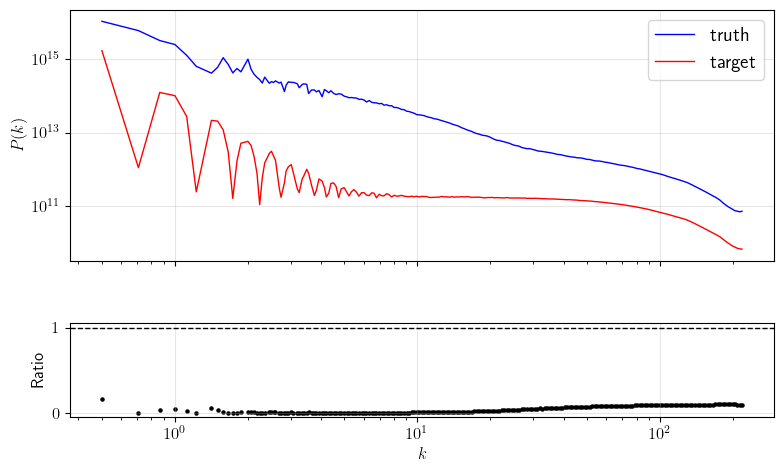

In [29]:
from utils import compute_power_spectrum_sphere, plot_power_spectrum_sphere

k, Pk_target = compute_power_spectrum_sphere(target_data[:10000], grid_size=512)
# _, Pk_source = compute_power_spectrum_sphere(source_data, grid_size=512)

plot_power_spectrum_sphere(k, Pk_target, Pk_source)

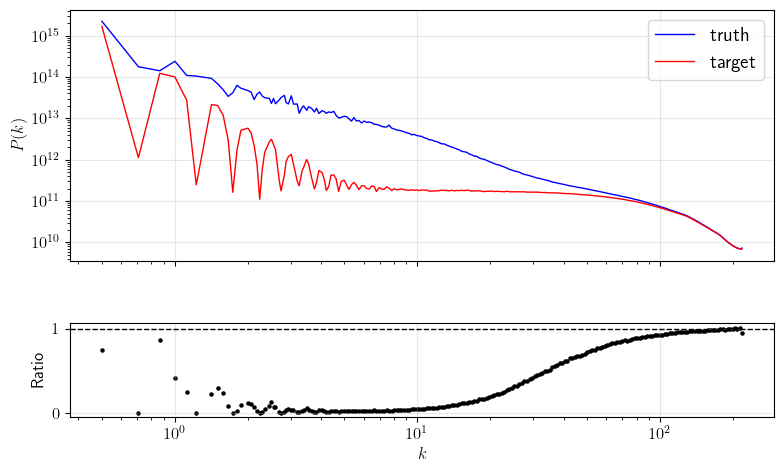

In [ ]:
from utils import compute_power_spectrum_sphere, plot_power_spectrum_sphere

k, Pk_target = compute_power_spectrum_sphere(target_data[:10000], grid_size=512)
_, Pk_source = compute_power_spectrum_sphere(source_data, grid_size=512)

plot_power_spectrum_sphere(k, Pk_target, Pk_source)

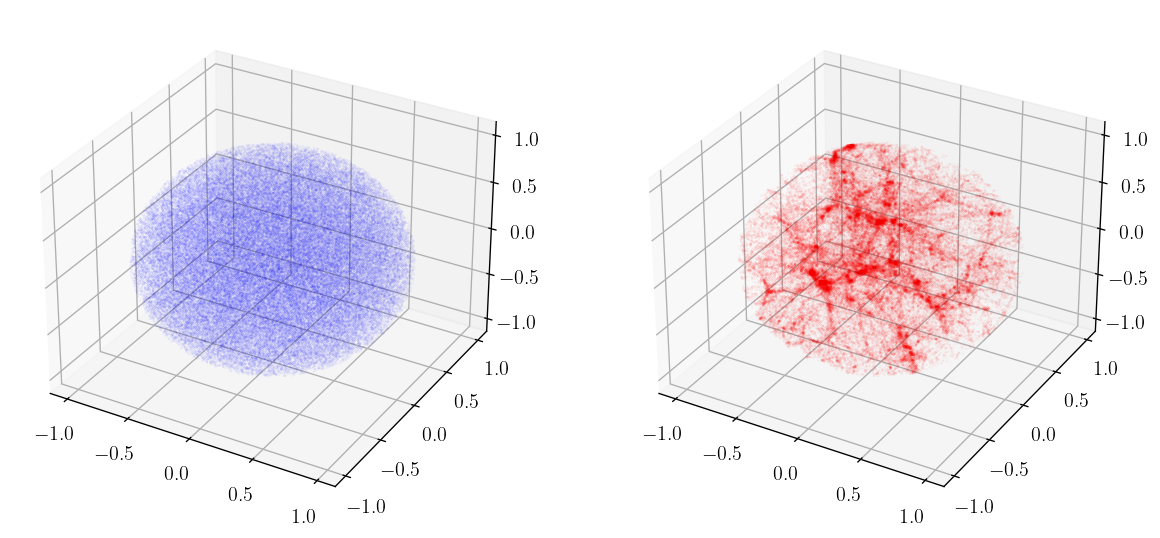

In [22]:
from utils import plot_lss_results

plot_lss_results(source_data, target_data, marker_size=0.001, alpha=0.5)

In [ ]:
import pytorch_lightning as L
from torch.utils.data import DataLoader
from cfm import ConditionalFlowMatching

from dataclasses import dataclass
from datasets import SphericalUniform, UchuuCentered, DataCoupling

#==================

@dataclass
class Config:
    exp_id = '4ccbb17faf71430d8be0ce5f33706c6e'
    ckpt = 'last'
    num_points = 100_000
    dim = 3
    dim_fourier = 256
    n_embd = 512
    num_blocks = 6
    dropout = 0.1
    sigma = 1e-4 # cfm hyperparameter
    flow = 'uniform'
    gamma = 1.0  # fourier feature hyperparameter
    batch_size = 1024
    mass_reg = 0.25
    use_mass_reg = True
    use_OT = True
    num_steps = 200

config = Config()

uniform_density = SphericalUniform(radius=1)
source_data = uniform_density.sample(num_points=config.num_points)

dataset = DataCoupling(source=source_data, target=None)
gen_dataloader = DataLoader(dataset, batch_size=config.batch_size, shuffle=False)              

base_dir = '/home/df630/LargeScaleStructureFlows/Results/LargeScaleStructure/'
model = ConditionalFlowMatching.load_from_checkpoint(base_dir + config.exp_id +f'/checkpoints/{config.ckpt}.ckpt',  map_location="cpu", config=config)

trainer = L.Trainer(accelerator='gpu', devices=[0], inference_mode=False)
sample_batched = trainer.predict(model, gen_dataloader)

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
/home/df630/.conda/envs/gaia_env/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/df630/.conda/envs/gaia_env/lib/python3.11/site-packages/torch/autograd/graph.py:824: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /pytorch/aten/src/ATen/cuda/CublasHandlePool.cpp:181.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


In [4]:
import torch

trajectories = torch.cat(sample_batched, dim=0)  # (N, num_timesteps, 3) 
trajectories.permute(1,0,2)  # (num_timesteps, N, 3)
trajectories = trajectories.permute(1,0,2)  # (num_timesteps, N, 3)
gen_sample = trajectories[-1]

torch.save(gen_sample, base_dir + config.exp_id + '/gen_sample.pt')

In [30]:
gen_sample.shape

torch.Size([100000, 3])

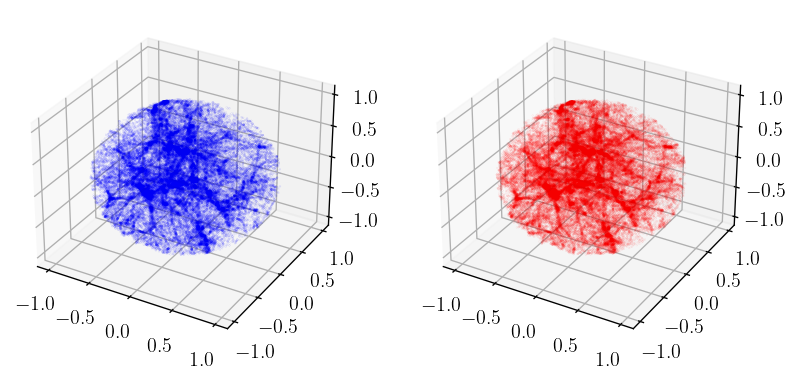

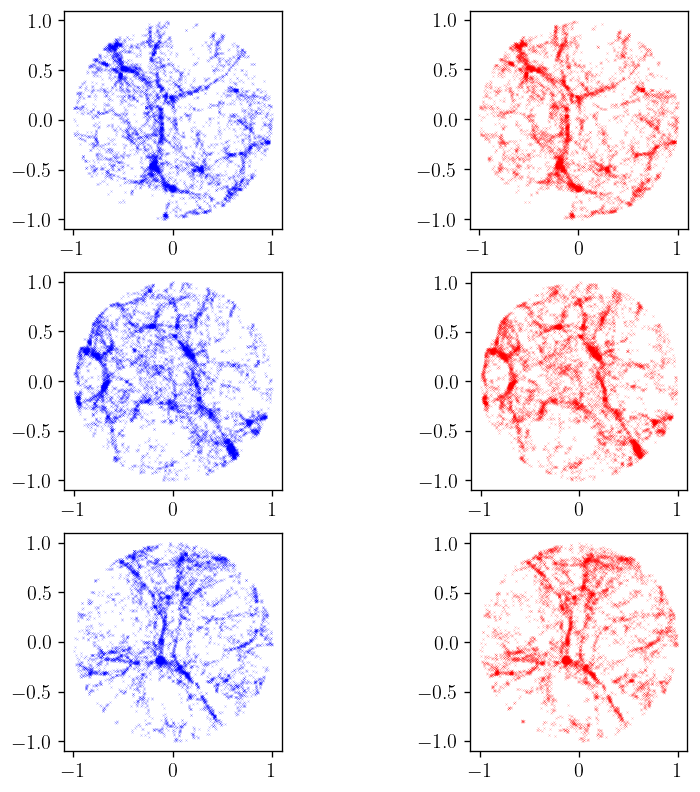

In [31]:
import matplotlib.pyplot as plt

from utils import plot_lss_results, plot_lss_slices

plot_lss_results(target_data[:100000], gen_sample, marker_size=0.001, alpha=0.75, figsize=(8,8))
plot_lss_slices(target_data[:100000], gen_sample, marker_size=0.002, figsize=(8,8), alpha=1,marker='x')


In [6]:
from utils import compute_power_spectrum_sphere, plot_power_spectrum_sphere

k, Pk_gen = compute_power_spectrum_sphere(gen_sample, grid_size=512)


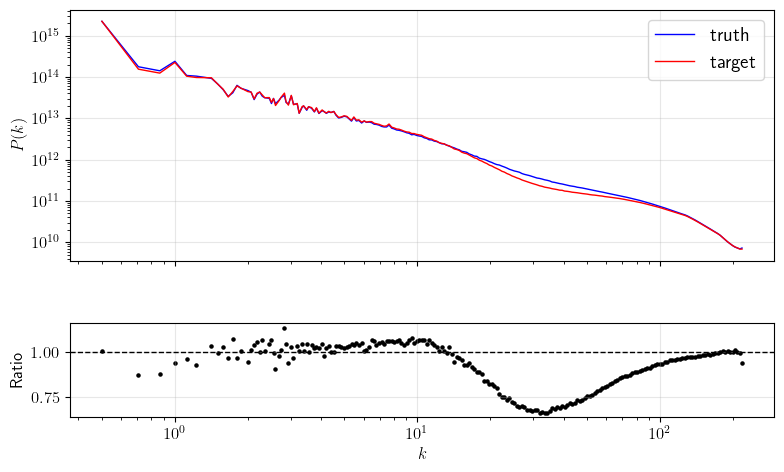

In [25]:
plot_power_spectrum_sphere(k, Pk_target, Pk_gen)

## Free-Fall Flow

In [9]:
import pytorch_lightning as L
from torch.utils.data import DataLoader
from cfm import ConditionalFlowMatching

from dataclasses import dataclass
from datasets import SphericalUniform, UchuuCentered, DataCoupling

#==================

@dataclass
class Config:
    exp_id = 'c5a2d062efde43b0a0383bffbecd86c9'
    ckpt = 'best'
    num_points = 100_000
    dim = 3
    dim_fourier = 256
    n_embd = 512
    num_blocks = 6
    dropout = 0.1
    sigma = 1e-4 # cfm hyperparameter
    flow = 'freefall'
    gamma = 1.0  # fourier feature hyperparameter
    batch_size = 1024
    mass_reg = 0.25
    use_mass_reg = True
    use_OT = True
    num_steps = 200

config = Config()

uniform_density = SphericalUniform(radius=1)
source_data = uniform_density.sample(num_points=config.num_points)

dataset = DataCoupling(source=source_data, target=None)
gen_dataloader = DataLoader(dataset, batch_size=config.batch_size, shuffle=False)              

base_dir = '/home/df630/LargeScaleStructureFlows/Results/LargeScaleStructure/'
model = ConditionalFlowMatching.load_from_checkpoint(base_dir + config.exp_id +f'/checkpoints/{config.ckpt}.ckpt',  map_location="cpu", config=config)

trainer = L.Trainer(accelerator='gpu', devices=[0], inference_mode=False)
sample_batched = trainer.predict(model, gen_dataloader)


Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
/home/df630/.conda/envs/gaia_env/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

In [10]:
import torch

trajectories = torch.cat(sample_batched, dim=0)  # (N, num_timesteps, 3) 
trajectories.permute(1,0,2)  # (num_timesteps, N, 3)
trajectories = trajectories.permute(1,0,2)  # (num_timesteps, N, 3)
gen_sample_freefall = trajectories[-1]

torch.save(gen_sample_freefall, base_dir + config.exp_id + '/gen_sample.pt')

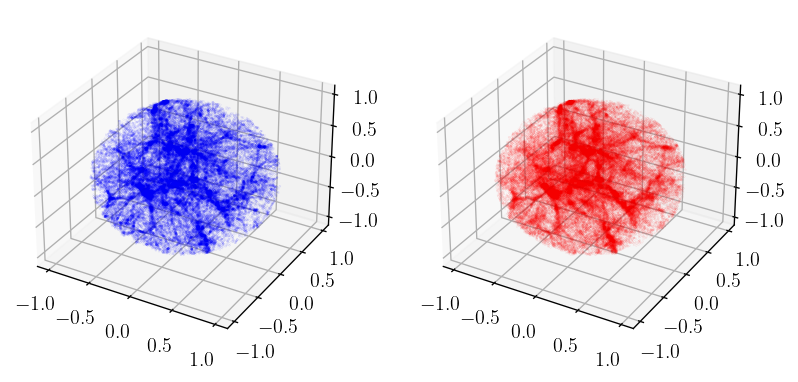

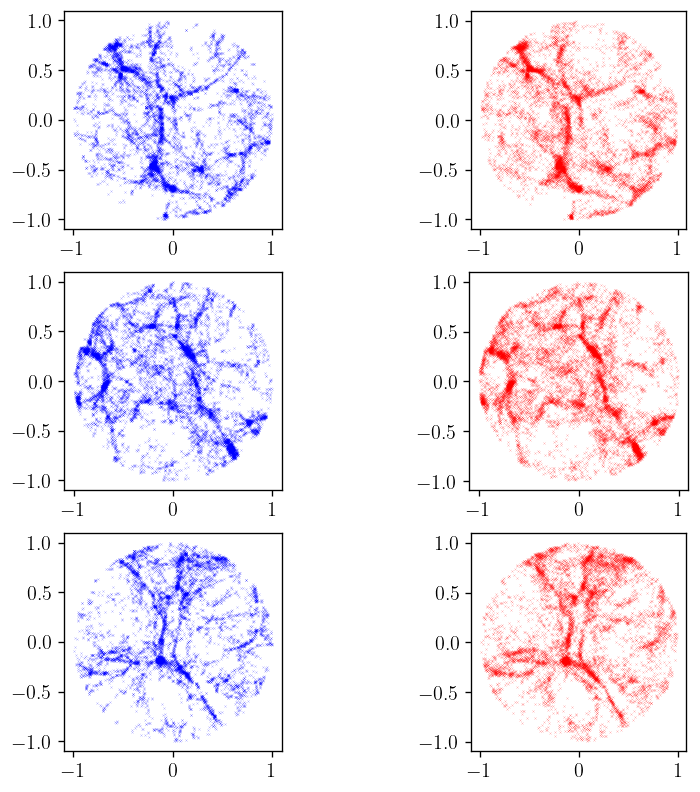

In [14]:
plot_lss_results(target_data, gen_sample_freefall, marker_size=0.001, alpha=0.75, figsize=(8,8))
plot_lss_slices(target_data, gen_sample_freefall, marker_size=0.002, figsize=(8,8), alpha=1,marker='x')

In [12]:
k, Pk_gen_freefall = compute_power_spectrum_sphere(gen_sample_freefall, grid_size=512)

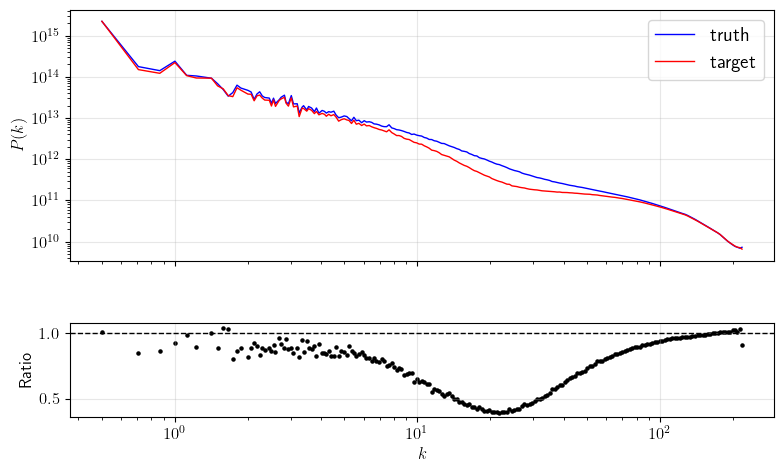

In [28]:
from utils import compute_power_spectrum_sphere, plot_power_spectrum_sphere

plot_power_spectrum_sphere(k, Pk_target, Pk_gen_freefall)

In [27]:
gen_sample_freefall.shape

torch.Size([100000, 3])